# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

## Data Preprocessing

In [18]:
! pip install seaborn
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.optimizers import Adam

# Now the code should work without any import errors.
# If there are any other issues, please provide additional context or error messages for further debugging.


### Training Image preprocessing

In [19]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 5224 files belonging to 11 classes.


### Validation Image Preprocessing

In [20]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 5224 files belonging to 11 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [21]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [22]:


# Add the first Conv2D layer with input shape
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))

# Add the second Conv2D layer without specifying input shape
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

# Add a MaxPool2D layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Print a success message
print("CNN model layers added successfully.")


CNN model layers added successfully.


In [23]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [24]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [25]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [26]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [27]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [28]:
cnn.add(tf.keras.layers.Flatten())

In [29]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [30]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [31]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=11,activation='softmax'))

### Compiling and Training Phase

In [32]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

# Compile the model
cnn.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Now the code should work without any import errors or warnings.
# If you encounter any other issues, feel free to ask for further assistance!



In [33]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 11)                  │          16,511 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,802,235 (29.76 MB)

 Trainable params: 7,802,235 (29.76 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 325s 2s/step - accuracy: 0.2588 - loss: 2.2821 - val_accuracy: 0.6193 - val_loss: 1.1079
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 316s 2s/step - accuracy: 0.6296 - loss: 1.0942 - val_accuracy: 0.7081 - val_loss: 0.8306
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 316s 2s/step - accuracy: 0.7252 - loss: 0.8041 - val_accuracy: 0.8417 - val_loss: 0.4649
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.8106 - loss: 0.5572 - val_accuracy: 0.8256 - val_loss: 0.4840
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - accuracy: 0.8254 - loss: 0.4988 - val_accuracy: 0.8913 - val_loss: 0.2990
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 316s 2s/step - accuracy: 0.8720 - loss: 0.3552 - val_accuracy: 0.9039 - val_loss: 0.2629
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 866s 5s/step - accuracy: 0.8979 - loss: 0.2903 - val_accuracy: 0.9556 - val_loss: 0.1397
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.9127 - loss: 0.2369 - val_accu

## Evaluating Model

In [35]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

164/164 ━━━━━━━━━━━━━━━━━━━━ 77s 469ms/step - accuracy: 0.9799 - loss: 0.0674
Training accuracy: 0.9816232919692993


In [36]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

164/164 ━━━━━━━━━━━━━━━━━━━━ 77s 469ms/step - accuracy: 0.9843 - loss: 0.0569
Validation accuracy: 0.9816232919692993


### Saving Model

In [37]:
cnn.save('trained_plant_disease_model.keras')

In [38]:
training_history.history #Return Dictionary of history

{'accuracy': [0.3855283260345459,
  0.660222053527832,
  0.7471286654472351,
  0.8171898722648621,
  0.8439892530441284,
  0.8736600279808044,
  0.9044793248176575,
  0.910222053527832,
  0.9264931082725525,
  0.9370214343070984],
 'loss': [1.84909188747406,
  0.9896671772003174,
  0.7342660427093506,
  0.5304595232009888,
  0.4351084530353546,
  0.3630143105983734,
  0.27432340383529663,
  0.24400773644447327,
  0.206884503364563,
  0.17688190937042236],
 'val_accuracy': [0.6192572712898254,
  0.7080780863761902,
  0.8416922092437744,
  0.8256125450134277,
  0.8912710547447205,
  0.9039050340652466,
  0.9555895924568176,
  0.9397013783454895,
  0.9467840790748596,
  0.9816232919692993],
 'val_loss': [1.1079204082489014,
  0.8306137919425964,
  0.46491745114326477,
  0.4839942455291748,
  0.2990240156650543,
  0.26287707686424255,
  0.139709934592247,
  0.162788525223732,
  0.14513319730758667,
  0.06097590923309326]}

In [39]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [40]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

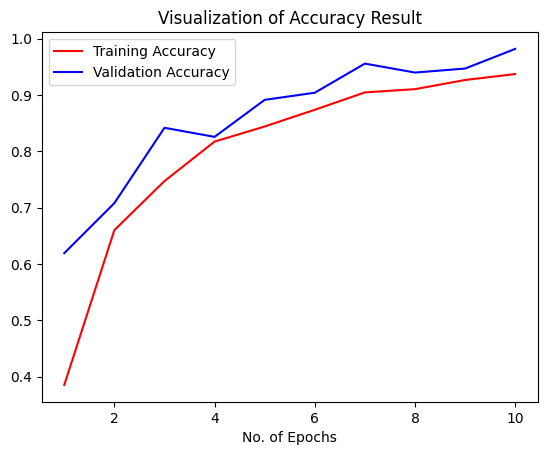

In [41]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [42]:
class_name = validation_set.class_names

In [43]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 5224 files belonging to 11 classes.


In [44]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

5224/5224 ━━━━━━━━━━━━━━━━━━━━ 146s 28ms/step


In [45]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [46]:
Y_true

<tf.Tensor: shape=(5224,), dtype=int64, numpy=array([ 0,  0,  0, ..., 10, 10, 10], dtype=int64)>

In [47]:
predicted_categories

<tf.Tensor: shape=(5224,), dtype=int64, numpy=array([ 0,  0,  0, ..., 10, 10, 10], dtype=int64)>

In [48]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [49]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                               precision    recall  f1-score   support

                    Background_without_leaves       0.97      1.00      0.99       100
                      Tomato___Bacterial_spot       0.96      0.99      0.98       660
                        Tomato___Early_blight       0.96      0.98      0.97       439
                         Tomato___Late_blight       0.99      0.98      0.98       531
                           Tomato___Leaf_Mold       1.00      0.99      0.99       335
                  Tomato___Septoria_leaf_spot       0.99      0.95      0.97       421
Tomato___Spider_mites Two-spotted_spider_mite       0.98      0.97      0.98       471
                         Tomato___Target_Spot       0.99      0.95      0.97       377
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       1.00      0.98      0.99       943
                 Tomato___Tomato_mosaic_virus       0.97      1.00      0.98       416
                             Tomato___heal

### Confusion Matrix Visualization

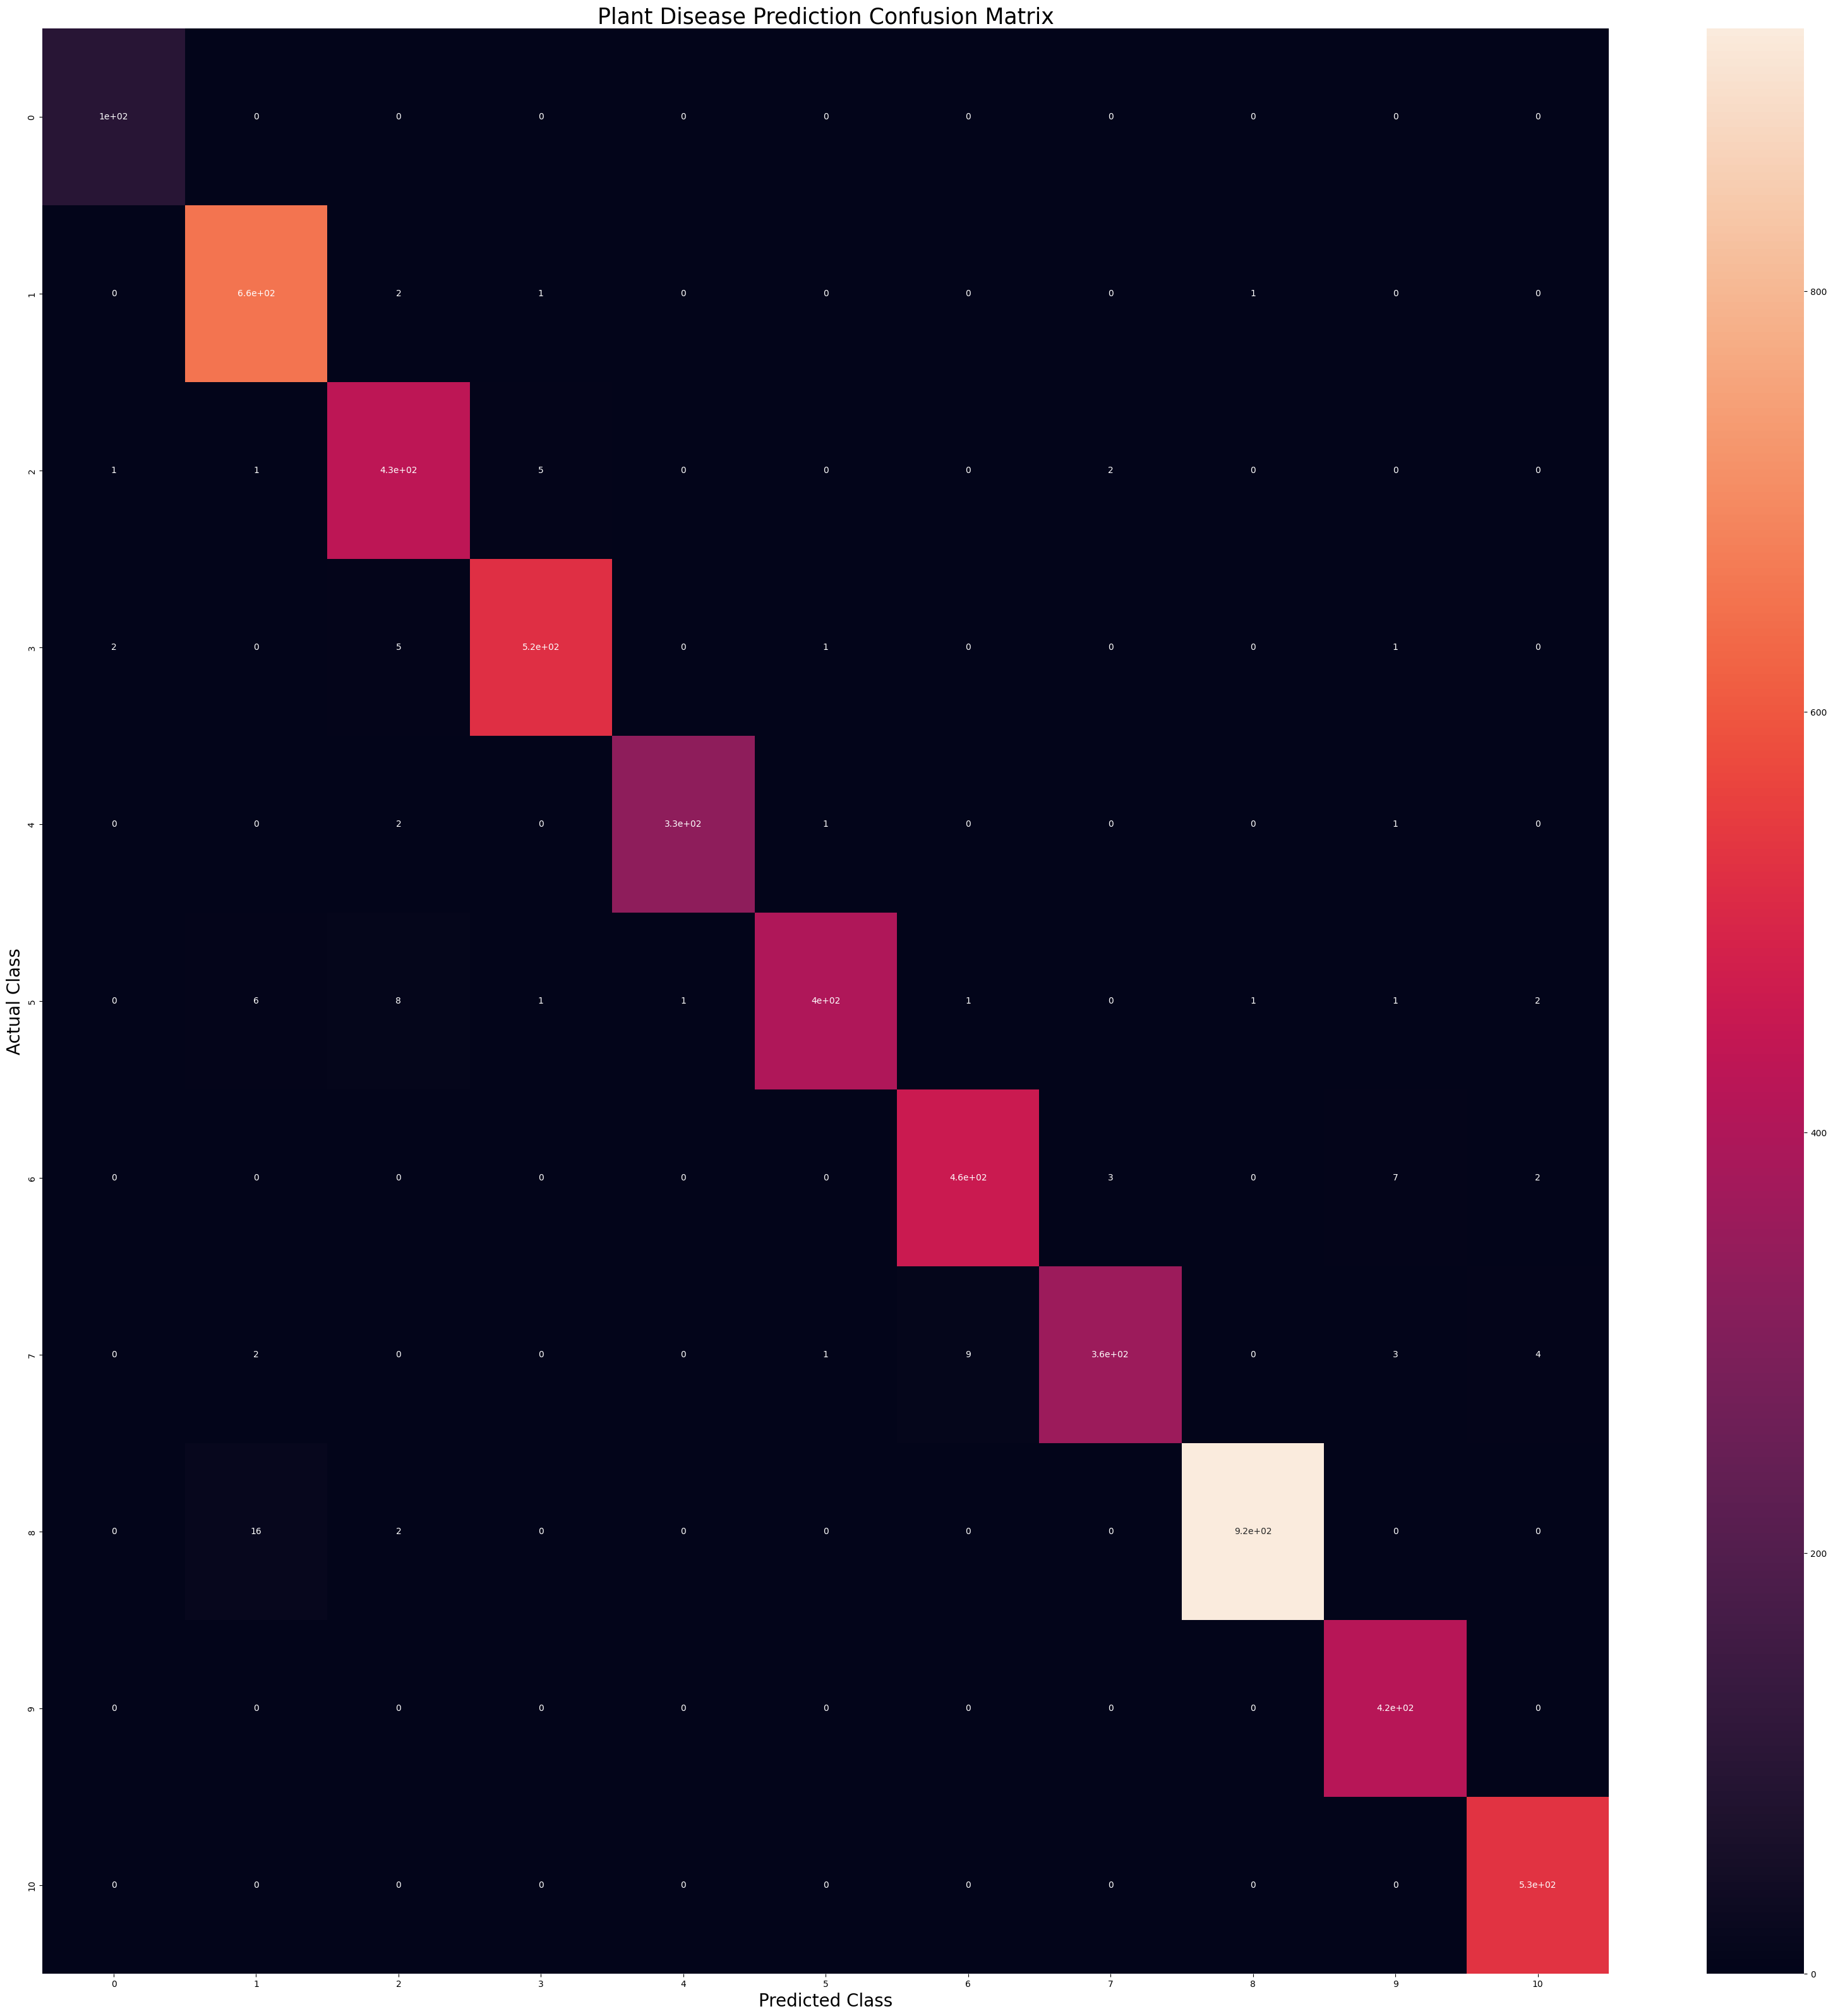

In [50]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()